In [1]:
import swarms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('paper')

In [2]:
Mearth = 5.972e24; M0 = 100*Mearth; Dt = 100.; Dmax = 100000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.898e27; a_pl = 30 * 1.49598e11
R_pl = 6.9911e7; eta = 0.3; Nstr = 6.; d_pl = 10 * 3.086e16; rho = 1000

argv = [M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl]

s = swarms.CollSwarm(M0=M0, Dt=Dt, Dmax=Dmax, L_s=L_s, M_s=M_s, M_pl=M_pl, a_pl=a_pl, R_pl=R_pl, eta=eta, Nstr=Nstr, d_pl=d_pl, rho=rho, correction=True, alpha=1./1.2)
Tcol = 1/s.computeRCC()
Tcol

395.0749543204719

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


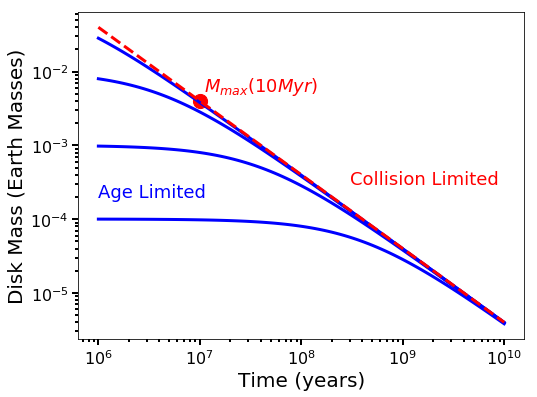

In [3]:
Nout = 100
times = np.logspace(6, 10, Nout)
fig, ax = plt.subplots(figsize=(8,6))
M0s = [0.1, 0.01, 0.001, 0.0001]
for M0 in M0s:
    s = swarms.CollSwarm(M0=M0*Mearth, Dt=Dt, Dmax=Dmax, L_s=L_s, M_s=M_s, M_pl=M_pl, a_pl=a_pl, R_pl=R_pl, eta=eta, Nstr=Nstr, d_pl=d_pl, rho=rho, correction=True, alpha=1./1.2)
    M = np.zeros(Nout)
    for i, time in enumerate(times):
        s.updateSwarm(time)
        M[i] = s.swarm.Mtot()
    ax.loglog(times, M/Mearth, c='b', label=r"${0} M_\oplus$".format(M0))
    
#ax.axvline(1e7, linestyle='--')
approx = 4.e-2/(times/1.e6)
ax.loglog(times, approx, 'r--')
ax.text(3.e8, 3.e-4, "Collision Limited", color='r', fontsize=18)
ax.text(1.e6, 2e-4, "Age Limited", color='b', fontsize=18)
ax.text(1.1e7, 5.5e-3, "$M_{max}(10 Myr)$", color='r', fontsize=18)
ax.scatter(1.e7, 4.e-3, c='r', s=200)
ax.set_xlabel('Time (years)')
ax.set_ylabel('Disk Mass (Earth Masses)')
fig.savefig('massvstime.pdf', bbox_inches='tight')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


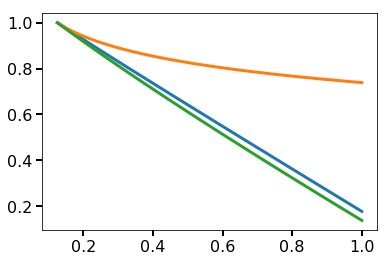

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

beta = 0.9
alpha = 0.1
    
def func(z,t):
    M, Dc = z
    return [-Dc**beta/t, t**alpha]    

z0=[1,1.e-1]
#t = np.logspace(-4,0,501)
t = np.linspace(z0[1]**beta, 1, 501)
xx=odeint(func, z0, t)
fig, ax = plt.subplots()
ax.plot(t, xx[:,0])
ax.plot(t, 1+t[0]*np.log(t[0]/t))
ax.plot(t, 1-t**beta*(alpha+1)/(beta*(alpha+1)**(beta+1)) + t[0]**beta*(alpha+1)/(beta*(alpha+1)**(beta+1)))
#ax.set_yscale('log')
#ax.set_xscale('log')